In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.loadtxt("4_25000_5000_500_6e-3_1e-5_2e-2_1e-2")

In [22]:
# TODO: parameters of the grid
cells_num = 25000
delta_r = 10 * 4 / 25000

In [55]:
super_rdf = []
for time in range(4000, 5000, 20):
    row = data[time, 2:]
    rdf = []
    for i in range(cells_num // 4, cells_num * 3 // 4):
        if row[i] == 0:
            continue
        _rdf = np.zeros(int(cells_num * 0.025))
        # computing rdf for an i-th guy
        for j in range(0, int(cells_num * 0.25), 10):
            right_cut = np.sum(row[i + j: i + j + 10])
            left_cut = np.sum(row[i - j - 9: i - j + 1])
            # we count j-th guy with him self
            if j == 0:
                    right_cut -= 2
            _rdf[j // 10] = (right_cut + left_cut) / (2 * delta_r)
        # multiply if there's more than one guy
        _rdf *= row[i]
        # 
        rdf.append(_rdf)
    rdf = np.array(rdf)
    print(rdf.shape)
    # do not normalize rdf
    rdf = rdf.mean(axis=0)
    super_rdf.append(rdf)
    

(1199, 625)
(1207, 625)
(1210, 625)
(1217, 625)
(1223, 625)
(1235, 625)
(1221, 625)
(1209, 625)
(1214, 625)
(1182, 625)
(1168, 625)
(1169, 625)
(1180, 625)
(1193, 625)
(1183, 625)
(1188, 625)
(1205, 625)
(1212, 625)
(1222, 625)
(1219, 625)
(1217, 625)
(1227, 625)
(1223, 625)
(1197, 625)
(1189, 625)
(1178, 625)
(1187, 625)
(1174, 625)
(1190, 625)
(1163, 625)
(1184, 625)
(1202, 625)
(1215, 625)
(1218, 625)
(1226, 625)
(1214, 625)
(1209, 625)
(1247, 625)
(1222, 625)
(1239, 625)
(1214, 625)
(1214, 625)
(1218, 625)
(1224, 625)
(1211, 625)
(1204, 625)
(1233, 625)
(1246, 625)
(1247, 625)
(1242, 625)


In [ ]:
# дважды считаем пары, поэтому завышена оценка 

In [56]:
super_rdf = np.array(super_rdf)
super_rdf = super_rdf.mean(axis=0)

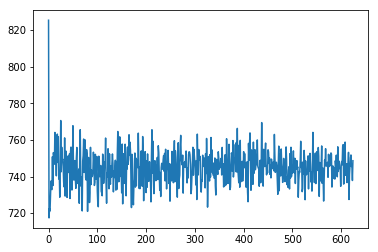

In [57]:
# average for 10 times
xx = np.linspace(0, int(cells_num * 0.5), super_rdf.shape[0])
plt.plot(super_rdf)
plt.show()

In [ ]:
# average for 50 times
xx = np.linspace(0, int(cells_num * 0.5), super_rdf.shape[0])
plt.plot(super_rdf)
plt.show()

In [45]:
for i in range(30):
    print(data[-i, 1])

500.0
2737.0
2736.0
2734.0
2728.0
2733.0
2741.0
2746.0
2749.0
2748.0
2744.0
2743.0
2739.0
2744.0
2748.0
2743.0
2754.0
2758.0
2759.0
2760.0
2753.0
2749.0
2740.0
2732.0
2734.0
2721.0
2732.0
2724.0
2719.0
2719.0


In [48]:
for i in range(30):
    print(super_rdf[-i])

[ 805.35863219  757.40200167  709.44537114  694.8498749   698.75938282
  732.38115096  742.02460384  713.87614679  731.33861551  703.45079233
  755.31693078  731.59924937  743.32777314  735.24812344  723.51959967
  753.75312761  754.27439533  745.93411176  764.17848207  730.55671393
  755.57756464  744.10967473  751.14678899  694.32860717  728.99291076
  768.86989158  738.37572977  754.01376147  725.08340284  723.51959967
  778.77397832  736.29065888  746.71601334  759.2264387   744.89157631
  740.98206839  773.82193495  733.42368641  727.68974145  731.85988324
  739.15763136  738.37572977  734.20558799  713.87614679  711.7910759
  773.30066722  756.88073394  781.11968307  734.98748957  731.33861551
  751.40742285  727.16847373  734.20558799  732.64178482  742.02460384
  780.07714762  741.76396997  724.82276897  796.4970809   733.16305254
  702.9295246   715.70058382  754.79566305  746.45537948  769.65179316
  739.67889908  722.21643036  720.65262719  761.83277731  729.25354462
  770.6

[ 796.24368687  698.12710438  688.39436027  713.38383838  718.11868687
  737.32112795  701.80976431  739.68855219  735.74284512  711.54250842
  727.3253367   686.02693603  734.42760943  718.64478114  726.27314815
  734.16456229  726.53619529  728.11447811  719.17087542  715.75126263
  721.01220539  731.00799663  674.18981481  693.65530303  726.53619529
  761.78451178  729.16666667  721.01220539  732.58627946  735.47979798
  694.44444444  714.1729798   723.11658249  738.89941077  706.01851852
  711.80555556  726.01010101  688.92045455  713.64688552  732.58627946
  723.37962963  719.96001684  728.64057239  737.32112795  692.86616162
  717.85563973  755.47138047  704.17718855  732.58627946  731.00799663
  785.45875421  706.54461279  747.05387205  688.13131313  722.59048822
  727.85143098  707.33375421  753.63005051  703.65109428  717.32954545
  715.75126263  732.32323232  703.125       678.13552189  733.11237374
  760.20622896  716.01430976  711.01641414  731.00799663  697.07491582
  698.

IndexError: list index out of range